# Relativistic Corrections to the Simple Harmonic Oscillator

## Preamble

In [1]:
import sympy as sp
from sympy.physics.quantum import Dagger,qapply
from sympy.physics.quantum.sho1d import RaisingOp, LoweringOp, SHOKet, SHOBra
import matplotlib.pyplot as plt
import numpy as np

A particle of mass $m$ moves in a 1-D harmonic potential
\begin{equation}
V(x)=\frac{1}{2}m\omega^2 x^2.
\end{equation}
Its non-relativistic kinetic energy $p^2/(2m)$ can be considered as an approximation for small velocities with respect to the speed of light $c$ of the relativistic energy
\begin{equation}
T=\sqrt{p^2c^2+m^2c^4}.
\end{equation}

In [2]:
c,m,omega,hbar = sp.symbols('c,m,omega,hbar',positive=True)
p=sp.Symbol('p')
sp.series(sp.sqrt((p**2)*(c**2)+(m**2)*(c**4)),p,n=8)

p**6/(16*c**4*m**5) - p**4/(8*c**2*m**3) + p**2/(2*m) + c**2*m + O(p**8)

The constant term of the expansion is the rest-energy
and only redefines the arbitrary additive constant energy. Dropping this contribution, the relativistic corrections of the harmonic oscillator can be written as
\begin{equation}
H=H_0+\delta_1H+\delta_2H
\end{equation}
with
\begin{equation}
H_0=\frac{p^2}{2 m}+\frac{1}{2}m\omega^2 x^2,\qquad\delta_1H=-\frac{p^4}{8 c^2 m^3},\qquad\delta_2H=\frac{p^6}{16 c^4 m^5}.
\end{equation}


In [3]:
alpha = SHOBra('alpha')
beta = SHOKet('beta')
Ad = RaisingOp('a')
A = LoweringOp('a')

Reduced Momentum: $p_r=-i(a-a^\dagger)$

Momentum: $p=\sqrt{\frac{m\hbar\omega}{2}}p_r$

In [4]:
pr=-sp.I*(A-Ad)
pr

-I*(a - RaisingOp(a))

## Matrix elements of the first perturbation $\left<\alpha\right|\delta_1 H\left|\beta\right>=-\frac{1}{8c^2m^3}\left<\alpha\right|p^4\left|\beta\right>=-\frac{1}{8c^2m^3}(\frac{\hbar m \omega}{2})^{2}\left<\alpha\right|p_r^4\left|\beta\right>$

In [5]:
from io import StringIO
import sys

In [6]:
buffer = StringIO()
sys.stdout = buffer

In [7]:
print(qapply(alpha*pr*pr*pr*pr*beta).simplify())
matrix_element_1= buffer.getvalue()

In [8]:
def d1H(a,b):
  u,v=sp.symbols('u,v')
  res0=sp.parse_expr((matrix_element_1.replace("alpha", "u")).replace("beta", "v"))
  res1=res0.subs([(u,a),(v,b)])
  return (-1/(8*c**2*m**3))*(hbar*m*omega/2)**(2)*res1

In [9]:
k,n=sp.symbols('k,n',positive=True)

In [10]:
d1H(k,n)

-hbar**2*omega**2*(-4*n**(3/2)*sqrt(n - 1)*KroneckerDelta(k, n - 2) + sqrt(n)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*KroneckerDelta(k, n - 4) + 2*sqrt(n)*sqrt(n - 1)*KroneckerDelta(k, n - 2) + 6*n**2*KroneckerDelta(k, n) - 4*n*sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(k, n + 2) + 6*n*KroneckerDelta(k, n) + sqrt(n + 1)*sqrt(n + 2)*sqrt(n + 3)*sqrt(n + 4)*KroneckerDelta(k, n + 4) - 6*sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(k, n + 2) + 3*KroneckerDelta(k, n))/(32*c**2*m)

## Matrix Elements of the second perturbation $\left<\alpha\right|\delta_2 H\left|\beta\right>=\frac{1}{16c^4m^5}\left<\alpha\right|p^6\left|\beta\right>=\frac{1}{16c^4m^5}(\frac{\hbar m \omega}{2})^{3}\left<\alpha\right|p_r^6\left|\beta\right>$

In [11]:
del buffer

In [12]:
buffer = StringIO()
sys.stdout = buffer
buffer.getvalue()

''

In [13]:
print(qapply(alpha*pr*pr*pr*pr*pr*pr*beta).simplify())
matrix_element_2= buffer.getvalue()

In [14]:
def d2H(a,b):
  u,v=sp.symbols('u,v')
  res0=sp.parse_expr((matrix_element_2.replace("alpha", "u")).replace("beta", "v"))
  res1=res0.subs([(u,a),(v,b)])
  return (1/(16*c**4*m**5))*((hbar*m*omega/2)**3)*res1

In [15]:
d2H(k,n)

hbar**3*omega**3*(-15*n**(5/2)*sqrt(n - 1)*KroneckerDelta(k, n - 2) + 6*n**(3/2)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*KroneckerDelta(k, n - 4) + 15*n**(3/2)*sqrt(n - 1)*KroneckerDelta(k, n - 2) - sqrt(n)*sqrt(n - 5)*sqrt(n - 4)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*KroneckerDelta(k, n - 6) - 9*sqrt(n)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*KroneckerDelta(k, n - 4) - 15*sqrt(n)*sqrt(n - 1)*KroneckerDelta(k, n - 2) + 20*n**3*KroneckerDelta(k, n) - 15*n**2*sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(k, n + 2) + 30*n**2*KroneckerDelta(k, n) + 6*n*sqrt(n + 1)*sqrt(n + 2)*sqrt(n + 3)*sqrt(n + 4)*KroneckerDelta(k, n + 4) - 45*n*sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(k, n + 2) + 40*n*KroneckerDelta(k, n) - sqrt(n + 1)*sqrt(n + 2)*sqrt(n + 3)*sqrt(n + 4)*sqrt(n + 5)*sqrt(n + 6)*KroneckerDelta(k, n + 6) + 15*sqrt(n + 1)*sqrt(n + 2)*sqrt(n + 3)*sqrt(n + 4)*KroneckerDelta(k, n + 4) - 45*sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(k, n + 2) + 15*KroneckerDelta(k, n))/(128*c**4*m**2)

## Unperturbed Energy Spectrum

In [16]:
def E(a):
    return hbar*omega*(a+sp.Rational(1,2))

Energy Differences

In [17]:
def Delta_E(a,b):
  return sp.simplify(E(a)-E(b))

## Corrections to First Order in Perturbation Theory

## $\delta_1 E_n=\left<n\right|\delta_1 H\left|n\right>$

In [18]:
def d1E(a):
    return d1H(a,a).simplify()

In [19]:
d1E(n)

3*hbar**2*omega**2*(-2*n**2 - 2*n - 1)/(32*c**2*m)

## $\left|\delta_1n\right>=\sum_{l\neq n}\frac{\left|l\right>}{E_n-E_l}\left<l\right|\delta_1 H\left|n\right>$

In [20]:
def d1(a):
    res=0
    for l in [a-4,a-2,a+2,a+4]:
        res=res+(d1H(l,a)/Delta_E(a,l))*SHOKet(l)
    return res.simplify()

In [21]:
d1(n)

hbar*omega*(-sqrt(n)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*|n - 4> + sqrt(n)*sqrt(n - 1)*(8*n - 4)*|n - 2> + (-8*n - 12)*sqrt(n**2 + 3*n + 2)*|n + 2> + sqrt(n**4 + 10*n**3 + 35*n**2 + 50*n + 24)*|n + 4>)/(128*c**2*m)

## Corrections to Second Order in Perturbation Theory

## $\delta_2 E_n=\sum_{l\neq n}\frac{|\left<l\right|\delta_1 H\left|n\right>|^2}{E_n-E_l}+\left<n\right|\delta_2 H\left|n\right>$

In [22]:
def d2E(a):
    res=d2H(a,a)
    for l in [a-4,a-2,a+2,a+4]:
        res=res+(d1H(a,l)*d1H(l,a)/Delta_E(a,l)).expand()
    return res.simplify()

In [23]:
d2E(n)

hbar**3*omega**3*(46*n**3 + 69*n**2 + 101*n + 39)/(512*c**4*m**2)

## $\left|\delta_2n\right>=-\frac{1}{2}\sum_{l\neq n}\left|\frac{\left<l\right|\delta_1 H\left|n\right>}{E_n-E_l}\right|^2\left|n\right>+\sum_{l\neq n}\frac{\left|l\right>}{E_n-E_l}\left(\sum_{j\neq n}\frac{\left<l\right|\delta_1 H\left|j\right>\left<j\right|\delta_1 H\left|n\right>}{E_n-E_j}-\delta_1E_n\frac{\left<l\right|\delta_1 H\left|n\right>}{E_n-E_l}+\left<l\right|\delta_2 H\left|n\right>\right)$

In [24]:
def coef(l,a):
  s=d2H(l,a)
  for j in [a-8,a-6,a-4,a-2,a+2,a+4,a+6,a+8]:
    s=s+(d1H(l,j)*d1H(j,a))/Delta_E(a,j).simplify()
  s=s-d1E(a)*d1H(l,a)/Delta_E(a,l).simplify()
  res=(s/Delta_E(a,l)).simplify()
  return res

def d2(a):
  res=0
  for l in [a-8,a-6,a-4,a-2,a+2,a+4,a+6,a+8]:
    res=res-sp.simplify(sp.Rational(1,2)*(d1H(l,a)/Delta_E(a,l))**2)*SHOKet(a)+coef(l,a)*SHOKet(l)
  return res.simplify()

In [25]:
d2(n)

hbar**2*omega**2*(sqrt(n)*(-48*n - 40)*sqrt(n - 5)*sqrt(n - 4)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*|n - 6> + 3*sqrt(n)*sqrt(n - 7)*sqrt(n - 6)*sqrt(n - 5)*sqrt(n - 4)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*|n - 8> + sqrt(n)*sqrt(n - 3)*sqrt(n - 2)*sqrt(n - 1)*(192*n**2 + 288*n - 1056)*|n - 4> + sqrt(n)*(-48*n**3*sqrt(n - 1) - 3096*n**2*sqrt(n - 1) + 2568*n*sqrt(n - 1) + 96*n*sqrt(n**5 + 5*n**4 + 7*n**3 - n**2 - 8*n - 4) - 4464*sqrt(n - 1) + 144*sqrt(n**5 + 5*n**4 + 7*n**3 - n**2 - 8*n - 4))*|n - 2> - 3*n*(n - 3)*(n - 2)*(n - 1)*|n> - 48*n*(n - 1)*(2*n - 1)**2*|n> + (-48*n - 8)*sqrt(n**6 + 21*n**5 + 175*n**4 + 735*n**3 + 1624*n**2 + 1764*n + 720)*|n + 6> - 3*(n + 1)*(n + 2)*(n + 3)*(n + 4)*|n> - 48*(n + 1)*(n + 2)*(2*n + 3)**2*|n> + (192*n**2 + 96*n - 1152)*sqrt(n**4 + 10*n**3 + 35*n**2 + 50*n + 24)*|n + 4> + (48*n*sqrt(n - 1)*(2*n - 1)*sqrt(n**3 + 2*n**2 - n - 2) - 144*(2*n + 3)*(2*n + 2*(n + 2)**2 + 5)*sqrt(n**2 + 3*n + 2) + 144*(2*n + 3)*sqrt(n**2 + 3*n + 2)*(2*n**2 + 2*n + 1) + (-48*sq

## Final Results

In [26]:
def Etot(n):
    return E(n)+d1E(n)+d2E(n)
def Tot(n):
    return SHOKet(n)+d1(n)+d2(n)

## Ground State

In [27]:
Etot(0)

hbar*omega/2 - 3*hbar**2*omega**2/(32*c**2*m) + 39*hbar**3*omega**3/(512*c**4*m**2)

In [28]:
Tot(0)

|0> + hbar*omega*(-6*sqrt(2)*|2> + sqrt(6)*|4>)/(64*c**2*m) + hbar**2*omega**2*(-39*|0> + 420*sqrt(2)*|2> - 96*sqrt(6)*|4> - 4*sqrt(5)*|6> + 3*sqrt(70)*|8>)/(4096*c**4*m**2)

## First Excited State

In [29]:
Etot(1)

3*hbar*omega/2 - 15*hbar**2*omega**2/(32*c**2*m) + 255*hbar**3*omega**3/(512*c**4*m**2)

In [30]:
Tot(1)

|1> + hbar*omega*(-10*sqrt(6)*|3> + sqrt(30)*|5>)/(64*c**2*m) + hbar**2*omega**2*(-315*|1> + 900*sqrt(6)*|3> - 72*sqrt(30)*|5> - 28*sqrt(35)*|7> + 9*sqrt(70)*|9>)/(4096*c**4*m**2)

## Normalization is accurate at order $c^{-4}$

In [31]:
qapply(Dagger(Tot(0))*Tot(0))

1 - 351*hbar**3*omega**3/(8192*c**6*m**3) + 410327*hbar**4*omega**4/(16777216*c**8*m**4)

In [32]:
qapply(Dagger(Tot(1))*Tot(1))

1 - 1755*hbar**3*omega**3/(4096*c**6*m**3) + 5147855*hbar**4*omega**4/(16777216*c**8*m**4)

In [33]:
qapply(Dagger(Tot(0))*Tot(1))

0

## Reduced Energy and Energy shifts w.r.t. $\hbar \omega$

In [34]:
e=sp.lambdify([n],E(n)/(hbar*omega))
d1e=sp.lambdify([n,hbar,omega,c,m],d1E(n)/(hbar*omega))
d2e=sp.lambdify([n,hbar,omega,c,m],d2E(n)/(hbar*omega))

In [35]:
m_num=9.10938*10**(-31) # kg (electron mass)
c_num=299792458 # m / s
hbar_num= 1.054571817*10**(-34) # kg m^2/ s
omega_num=2*np.pi*10**(19) # 1/s

In [36]:
N=np.array([0,1,2,3,4,5,6])

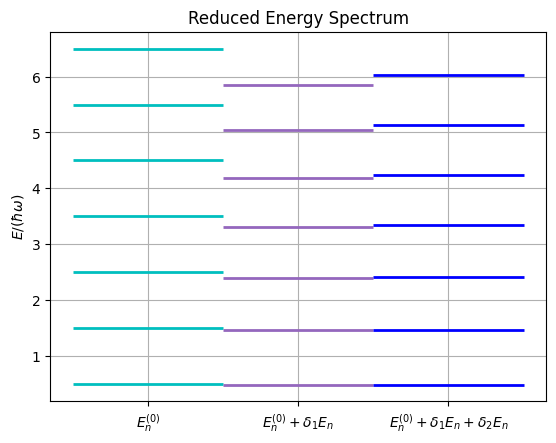

In [38]:
# Generate the reduced energy levels and their splitting values
energy_levels= e(N) # relative energy levels for the unperturbed hamiltonian
splitting_values_1=d1e(N,hbar_num,omega_num,c_num,m_num) # relativistic corrections at first order
splitting_values_2=d2e(N,hbar_num,omega_num,c_num,m_num) # relativistic corrections at second order

# Create a figure and axix object
fig, ax=plt.subplots()

# Plot the energy levels
for i in range(len(energy_levels)):
  ax.hlines(energy_levels[i],0.0,1.0,'c',lw=2)
  ax.hlines(energy_levels[i]+splitting_values_1[i],1.0,2.0,'tab:purple',lw=2)
  ax.hlines(energy_levels[i]+splitting_values_1[i]+splitting_values_2[i],2.0,3.0,'b',lw=2)
ax.set_xticks([0.5,1.5,2.5])
ax.set_xticklabels([r'$E^{(0)}_n$',r'$E^{(0)}_n+\delta_1E_n$',r'$E^{(0)}_n+\delta_1E_n+\delta_2E_n$'])
ax.set_ylabel(r'$E/(\hbar\omega)$')
ax.set_title('Reduced Energy Spectrum')
ax.grid()